### Graph Theory Assignment 3
> Kaushal Lodd - BT19CSE052

> Saarang Rajguru - BT19CSE092

*Importing Libraries*

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import sys
sys.path.append('../')
import utils.utilities as utils

*Reading Dataset*

In [17]:
x = pd.read_csv('../../cleaned_dataset/merged_dataset.csv')
y = pd.read_csv('../../dataset/actual.csv')

print(x.shape)
nodes = x.values
x.head()


(72, 7130)


,Patient,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,1,-214,-153,-58,88,-295,-558,199,-176,252,...,185,511,-125,389,-37,793,329,36,191,-37
1,2,-139,-73,-1,283,-264,-400,-330,-168,101,...,169,837,-36,442,-17,782,295,11,76,-14
2,3,-76,-49,-307,309,-376,-650,33,-367,206,...,315,1199,33,168,52,1138,777,41,228,-41
3,4,-135,-114,265,12,-419,-585,158,-253,49,...,240,835,218,174,-110,627,170,-50,126,-91
4,5,-106,-125,-76,168,-230,-284,4,-122,70,...,156,649,57,504,-26,250,314,14,56,-25


In [18]:
y.head()

,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL


*Printing the Adjacency Matrix*

In [19]:
# Create a graph object
G = utils.Graph(nodes)

# Calculate the adjacency matrix of the training dataset
G.compute_adjacency_matrix()
np.set_printoptions(precision=3)
print(G.adjacency_matrix.shape)
print(G.adjacency_matrix)

# Adding edges
for i in range(len(G.nodes)):
    for j in range(len(G.nodes)):
        if G.adjacency_matrix[i][j] != 0:
            G.add_edge(G.nodes[i], G.nodes[j])

(72, 72)
[[     0.     84238.563  88486.177 ...  83298.155  70427.452  60936.541]
 [ 84238.563      0.     84387.974 ... 102642.753  82742.1    83679.759]
 [ 88486.177  84387.974      0.    ... 102304.189 103878.755  94722.794]
 ...
 [ 83298.155 102642.753 102304.189 ...      0.     82128.374  72886.682]
 [ 70427.452  82742.1   103878.755 ...  82128.374      0.     53675.325]
 [ 60936.541  83679.759  94722.794 ...  72886.682  53675.325      0.   ]]


*Printing MST Adjacency Matrix and visualize MST*

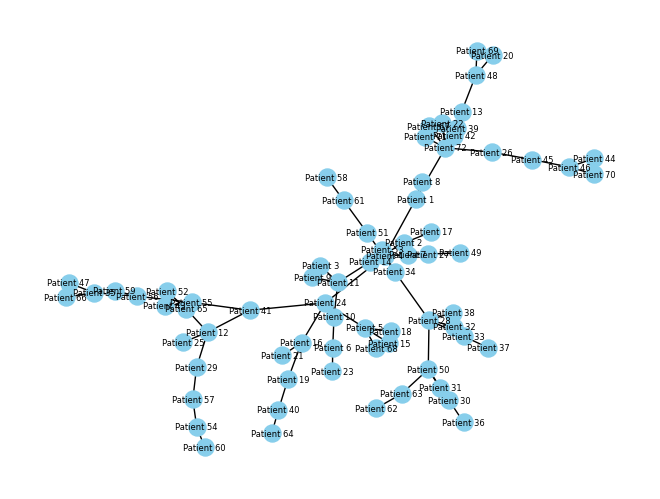

In [20]:
# Calculate the minimum spanning tree of the training dataset
mst = G.get_mst()

# Visualize the minimum spanning tree
G_nx = nx.Graph()
G_nx.add_nodes_from(mst.nodes)
G_nx.add_edges_from(mst.get_edges())
nx.draw(G_nx, with_labels=True, node_size=150, node_color='skyblue', font_size=6, font_color='black')
plt.show()


*Removing Inconsistent Edges (longest edge)*

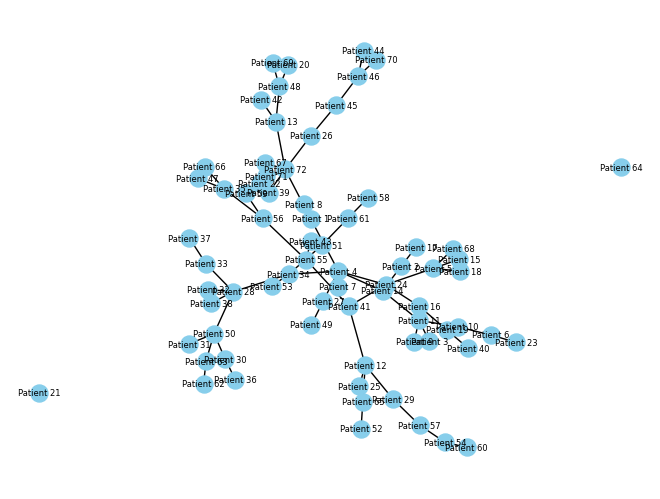

In [21]:
# Remove k longest edges from MST
k = len(np.unique(y['cancer']))
G.remove_k_inconsistent_edges(mst, k, "LONGEST_EDGE")

# Visualize the k Clusters
G_nx = nx.Graph()
G_nx.add_nodes_from(mst.nodes)
G_nx.add_edges_from(mst.get_edges())
nx.draw(G_nx, with_labels=True, node_size=150, node_color='skyblue', font_size=6, font_color='black')
plt.show()


*Remove Inconsistent Edges(max standard deviation)*

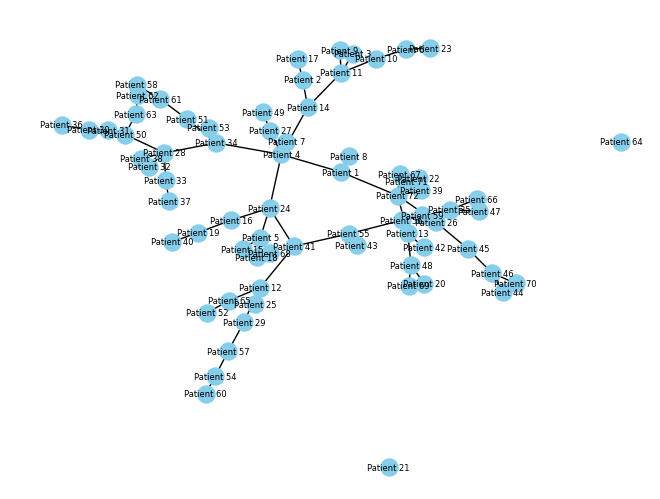

In [22]:
# Remove inconsistent edges based on standard deviation
G.remove_k_inconsistent_edges(mst, k, "MAX_STD_DEV")

# Visualize the k Clusters
G_nx = nx.Graph()
G_nx.add_nodes_from(mst.nodes)
G_nx.add_edges_from(mst.get_edges())
nx.draw(G_nx, with_labels=True, node_size=150, node_color='skyblue', font_size=6, font_color='black')
plt.show()